# Table of Contents

1. [Introduction](#Introduction)
2. [Importing libraries and Data Set Up](#Importing-libraries-and-Data-Set-Up)
3. [Data View and Cleaning](#2.-Data-View-and-Cleaning)
4. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    * [Univariate Analysis](#Univariate-Analysis)
    * [Multivariate Analysis](#Multivariate-Analysis)
5. [Featurization](#Featurization)
6. [Model Exploration](#Model-Exploration)
    * [Linear Regression](#Linear-Regression)
    * [SVM](#SVM)
    * [Random Forest](#Random-Forest)
    * [Boosted Trees](#Boosted-Trees)
7. [Conclusion](#Conclusion)
8. [References](#References)

# Introduction

### Problem Statement
---
Predict selling price of used cars

---

### Details:
This dataset contains information about used cars listed on www.cardekho.com
The columns in the given dataset are as follows:
1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

### Metrics Used:

* Coefficient of Determination

# Importing libraries and Data Set Up

In [1]:
# Basics and Data Visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter Searching Libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('car details.csv')

# 2. Data View and Cleaning

In [3]:
# Viewing the dataframe

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


---
> * There are 4340 rows with 8 columns each
---

## Null Values Check

In [5]:
data.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

> * There are no Null Values in any of the columns.

## Duplicate Check

In [7]:
data.duplicated().value_counts()

False    3577
True      763
dtype: int64

In [8]:
data = data.drop_duplicates()

> * There are 763 duplicate rows which we have dropped.

# 3. Exploratory Data Analysis

In [9]:
# View Data

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


> * As evident, we are now left with 3577 rows after de-duplication.

In [59]:
data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
90%,2018.000000,8.750000e+05,120000.000000
95%,2019.000000,1.200000e+06,149534.800000
99%,2020.000000,2.675000e+06,223158.400000


> * Observe abrupt increase in values of selling_price and km_driven. This signifies presence of outliers.

In [10]:
# Number of Car Models in the data with their frequencies

data['name'].value_counts()

Maruti Swift Dzire VDI                  54
Maruti Alto 800 LXI                     48
Maruti Alto LXi                         42
Maruti Alto LX                          30
Maruti Swift VDI BSIV                   28
                                        ..
Tata Manza Club Class Quadrajet90 LS     1
Mahindra Marazzo M8 8Str                 1
Fiat Linea Active (Diesel)               1
Maruti Alto K10 LXI CNG Optional         1
Tata Aria Pure LX 4x2                    1
Name: name, Length: 1491, dtype: int64

> * There are 1491 car models in the dataset with 69 as highest frequency and 1 as the least.

### Univariate Analysis

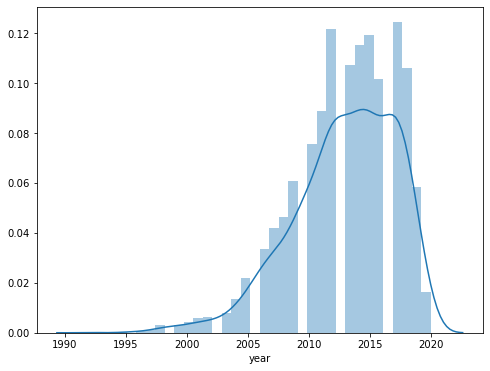

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1999      9
1998      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [36]:
# Histogram of 'year' in which the cars were purchased

plt.figure(figsize=(8,6))
sns.distplot(data['year'])
plt.show()

data['year'].value_counts()

> * Most of the cars in the dataset were purchased post 2010 period.

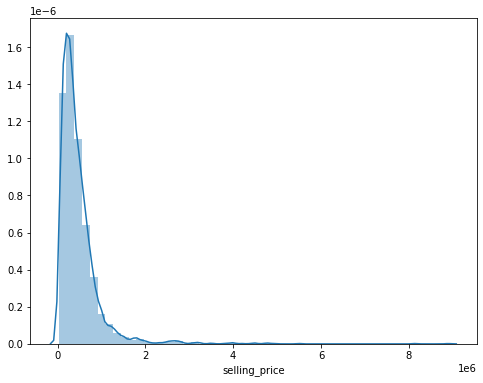

In [35]:
# Histogram of 'selling Price' of cars

plt.figure(figsize=(8,6))
sns.distplot(data['selling_price'])
plt.show()

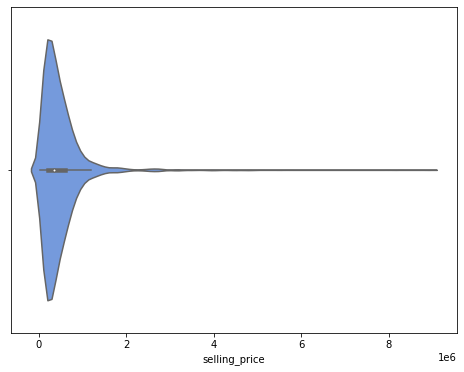

In [18]:
# Violin plot of selling price
    
plt.figure(figsize=(8,6))
sns.violinplot(data['selling_price'], color='cornflowerblue')
plt.show()s

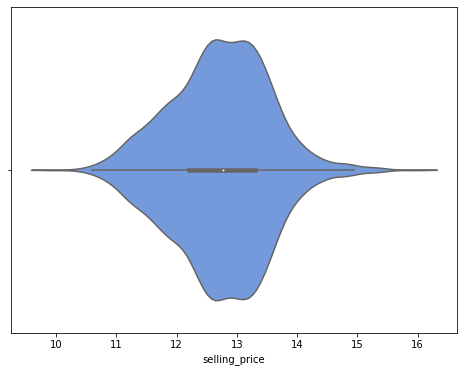

In [105]:
# Violin plot of logarithm of selling_price

plt.figure(figsize=(8,6))
sns.violinplot(np.log(data['selling_price']), color='cornflowerblue')
plt.show()

In [92]:
# Storing log values in a separate column

data['log_selling_price'] = np.log(data['selling_price'])

<ipython-input-92-c9b798ebbd0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_selling_price'] = np.log(data['selling_price'])


In [26]:
# In depth description of the selling price

print(data['selling_price'].describe())

count    3.577000e+03
mean     4.739125e+05
std      5.093018e+05
min      2.000000e+04
25%      2.000000e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64


In [27]:
# Median 

print(data['selling_price'].median())

350000.0


> * Most of the cars have been sold for under ₹2M(Violin plot) with the most costly selling going as high as ₹8M. Probably, some premium car.
> * 75th percentile at ₹ 6lakh or ₹ 600,000.
> * Mean and median prices being ₹ 473000 and ₹ 350000
> * Taking logarithmic values of 'selling_price' makes the distribution nearly Normal which will be better for modelling.

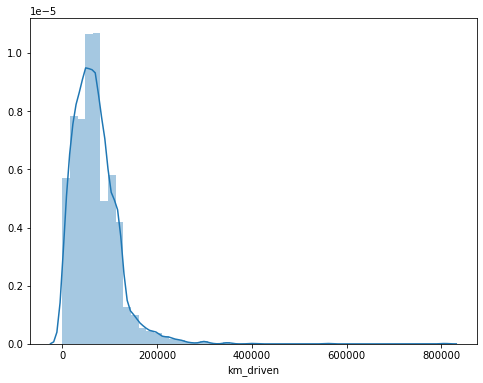

In [34]:
# Distribtion of 'km_driven'

plt.figure(figsize=(8,6))
sns.distplot(data['km_driven'])
plt.show()

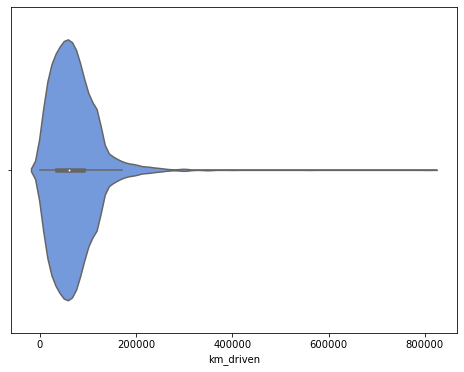

In [96]:
# Violin plot 'km_driven'

plt.figure(figsize=(8,6))
sns.violinplot(data['km_driven'], color='cornflowerblue')
plt.show()

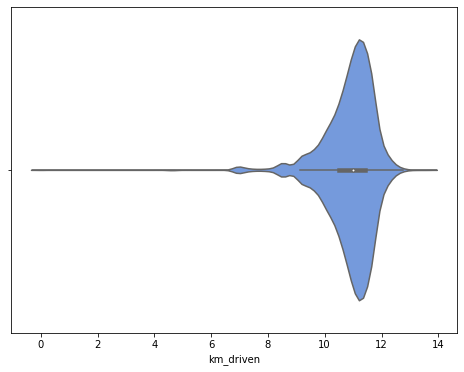

In [106]:
# Taking log of km_driven

plt.figure(figsize=(8,6))
sns.violinplot(np.log(data['km_driven']), color='cornflowerblue')
plt.show()

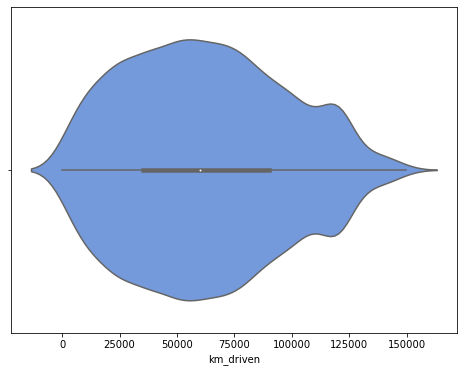

In [104]:
# Violin plot 'km_driven' with removed data whose p-value > 0.05

plt.figure(figsize=(8,6))
sns.violinplot(data[data['km_driven'] < data['km_driven'].quantile(0.95)]['km_driven'], color='cornflowerblue')
plt.show()

In [108]:
# Storing data with removed values of 'km_driven'

data = data[data['km_driven'] < data['km_driven'].quantile(0.95)]

In [30]:
data['km_driven'].describe()

count      3577.000000
mean      69250.545709
std       47579.940016
min           1.000000
25%       36000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [32]:
data['km_driven'].median()

60000.0

---
> * The log trick didn't work here as in the case of 'selling_price'.
> * Removal of data above 95 quantile makes it less prone to outliers.
> * Mean distance driven  = 69250 km
> * Median distance driven = 60000 km
> * 75th percentile of distance driven = 90000 km
---

Petrol      1698
Diesel      1643
CNG           37
LPG           19
Electric       1
Name: fuel, dtype: int64


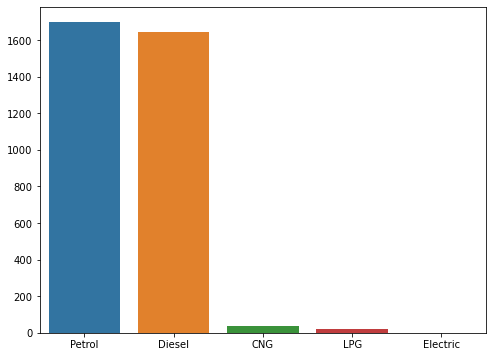

In [109]:
# Fuel type Count

print(data['fuel'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['fuel'].value_counts().index, y = data['fuel'].value_counts().values)
plt.show()

> * 98.3% of the cars are of fuel type 'Diesel' and 'Petrol'

Individual          2670
Dealer               695
Trustmark Dealer      33
Name: seller_type, dtype: int64


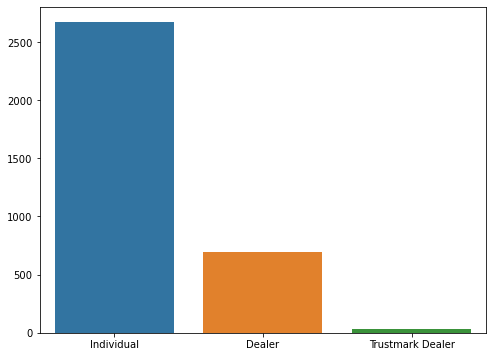

In [110]:
# Seller Type count

print(data['seller_type'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['seller_type'].value_counts().index, y = data['seller_type'].value_counts().values)
plt.show()

> * ~79% of the cars are sold by individuals and ~20% by dealers.

Manual       3094
Automatic     304
Name: transmission, dtype: int64


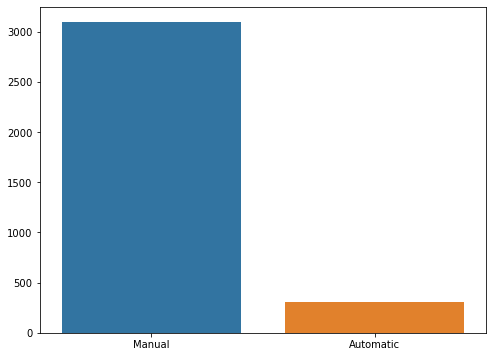

In [111]:
# Transmission type count

print(data['transmission'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['transmission'].value_counts().index, y = data['transmission'].value_counts().values)
plt.show()

> * 91.2% of cars are fitted with Manual transmission

First Owner             2138
Second Owner             924
Third Owner              254
Fourth & Above Owner      65
Test Drive Car            17
Name: owner, dtype: int64


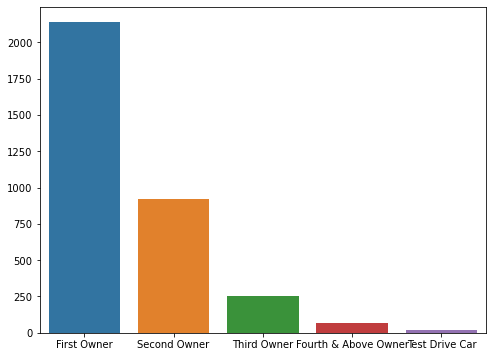

In [112]:
# Owner type count

print(data['owner'].value_counts())

plt.figure(figsize=(8,6))
sns.barplot(x=data['owner'].value_counts().index, y = data['owner'].value_counts().values)
plt.show()

> * 62% cars are sold by 'First Owner', 27% by 'Second Owner', 8% by 'Third Owner' which constitutes total of ~98% data.

## Multivariate Analysis
We now dig deeper into analysing how the independent features affects the dependent feature aka 'selling_price'.

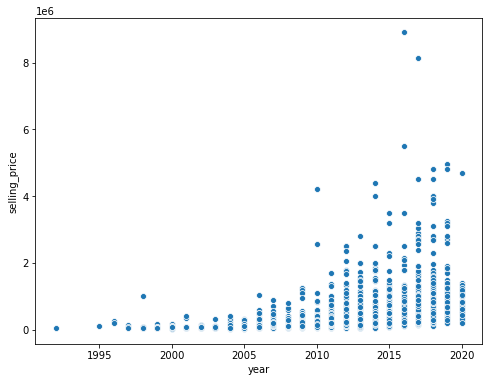

In [114]:
# Selling Price VS Year in which car was purchased

plt.figure(figsize=(8,6))
sns.scatterplot(x = data['year'], y = data['selling_price'])
plt.show()

---
> * The more recent the car is, more is the selling_price.

___

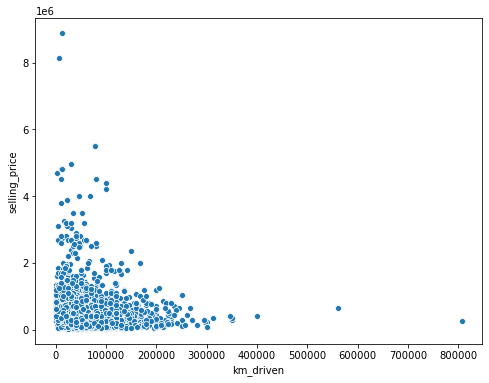

In [58]:
# Selling Price VS km_driven

plt.figure(figsize=(8,6))
sns.scatterplot(x = data['km_driven'], y = data['selling_price'])
plt.show()

---
> * More is km_driven, less is the 'Selling_price'
---

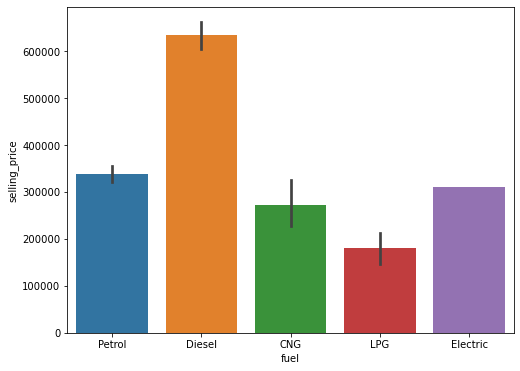

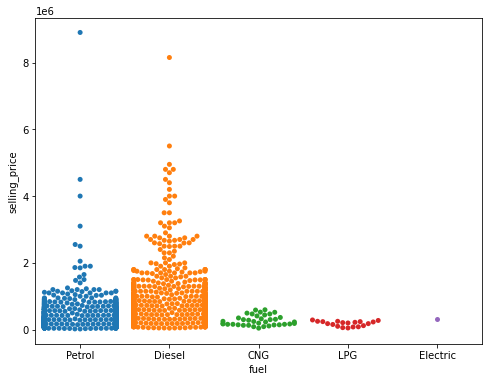

In [116]:
# Selling Price VS fuel type

plt.figure(figsize=(8,6))
sns.barplot(x=data['fuel'], y=data['selling_price'])
plt.show()

plt.figure(figsize=(8,6))
sns.swarmplot(x=data['fuel'], y=data['selling_price'])
plt.show()

---
> * Diesel vehicles tend to have higher price than petrol ones.

---

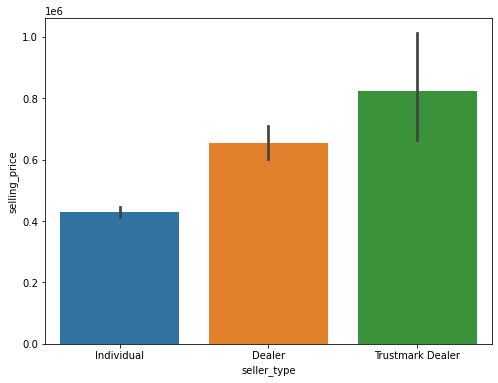

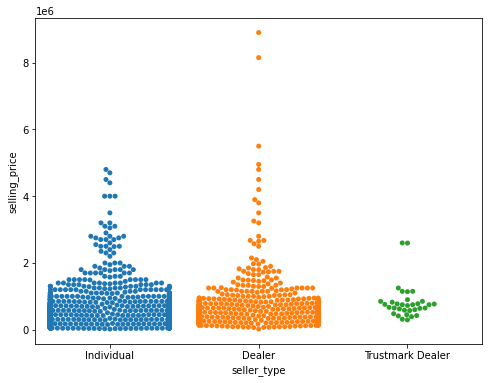

In [117]:
# Selling Price VS Seller Type

plt.figure(figsize=(8,6))
sns.barplot(x=data['seller_type'], y=data['selling_price'])
plt.show()

plt.figure(figsize=(8,6))
sns.swarmplot(x=data['seller_type'], y=data['selling_price'])
plt.show()

---
> * Individuals tend to get lower resale value than dealers.

---

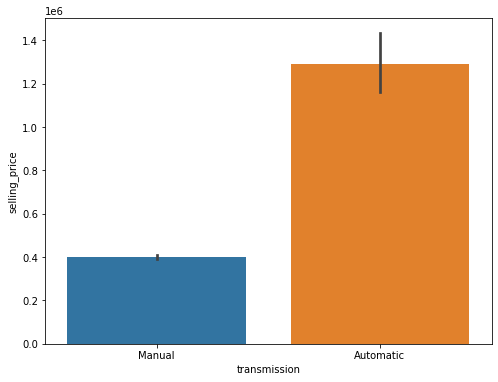

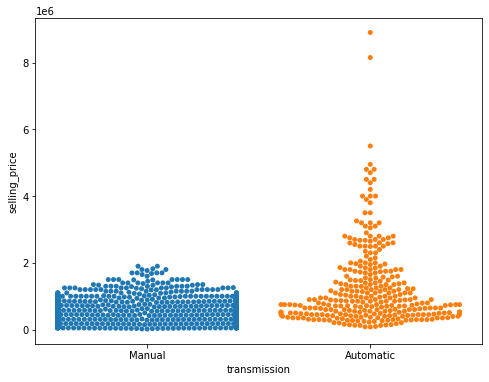

In [118]:
# Selling Price VS Gear Transmission type

plt.figure(figsize=(8,6))
sns.barplot(x=data['transmission'], y=data['selling_price'])
plt.show()

plt.figure(figsize=(8,6))
sns.swarmplot(x=data['transmission'], y=data['selling_price'])
plt.show()

---
> * Automatic Vehicles have better resale value than Manual ones.
---

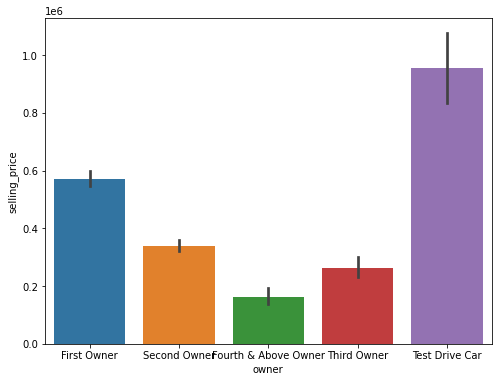

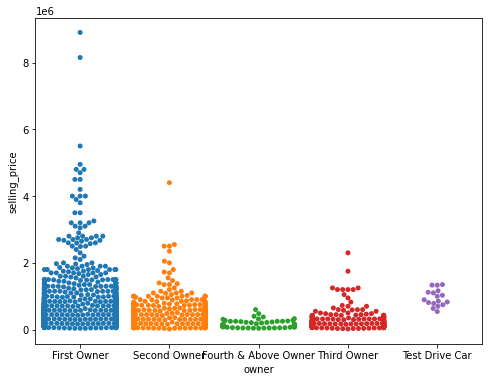

In [119]:
# Selling Price VS Owner type

plt.figure(figsize=(8,6))
sns.barplot(x=data['owner'], y=data['selling_price'])
plt.show()

plt.figure(figsize=(8,6))
sns.swarmplot(x=data['owner'], y=data['selling_price'])
plt.show()

---
> * Resale value of the car decreases with each ownership.

---

# Featurization

0. Train Test Split
1. Name as Categorical Variable(Ordinal)
2. Year as same(OR #years used)
3. Selling Price as dependent variable 'y'
4. km_driven as same
5. Fuel as Categorical Variable(Ordinal)
6. Seller_type as categorical variable
7. Transmission as Cat Varible(Ordinal)
8. Owner as Cat Variable(Ordinal)

* Convert skewed distributed data columns to Normal distributed for better accuracy of the model.

In [154]:
# Target Encoding for names

encoder = ce.TargetEncoder(cols='name')
train['name'] = encoder.fit_transform(data['name'], data['selling_price'])

# Ordinal Encoding for 'Fuel' as cost(Electric) > Cost(Diesel) > cost(CNG) > cost(petrol) > cost(LPG)

encoder = ce.OrdinalEncoder(cols=['fuel'], return_df=True, mapping=[{'col':'fuel','mapping':\
            {'Electric':5,'Diesel':4,'CNG':3, 'Petrol':2, 'LPG':1}}])
train['fuel'] = encoder.fit_transform(data['fuel'])

# Ordinal Encoding for seller_type as Individuals tend to sell vehicles at cheaper price than Dealers and dealers
# at cheaper price than Trustmark Dealers

encoder = ce.OrdinalEncoder(cols=['seller_type'], return_df=True, mapping=[{'col':'seller_type','mapping':\
            {'Individual':1,'Dealer':2,'Trustmark Dealer':3}}])
train['seller_type'] = encoder.fit_transform(data['seller_type'])

# Ordinal Encoding for Transmission as Automatic vehicles are more costly than Manual

encoder = ce.OrdinalEncoder(cols=['transmission'], return_df=True, mapping=[{'col':'transmission','mapping':\
            {'Manual':1,'Automatic':2}}])
train['transmission'] = encoder.fit_transform(data['transmission'])

# Ordinal Encoding for Owner

encoder = ce.OrdinalEncoder(cols=['owner'], return_df=True, mapping=[{'col':'owner','mapping':\
            {'Test Drive Car':1,'Fourth & Above Owner':2, 'Third Owner':3, 'Second Owner':4,'First Owner':5}}])
train['owner'] = encoder.fit_transform(data['owner'])

<ipython-input-154-45e290d2143b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name'] = encoder.fit_transform(data['name'], data['selling_price'])
<ipython-input-154-45e290d2143b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['fuel'] = encoder.fit_transform(data['fuel'])
<ipython-input-154-45e290d2143b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [155]:
# Splitting train variable to X and y

X = train.drop(['selling_price', 'log_selling_price'], axis = 1)

y = train['log_selling_price']

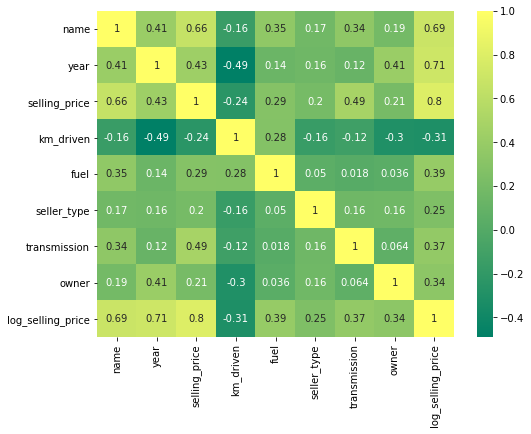

In [158]:
# Correlation Heatmap of features of Train data

plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,cmap='summer')
plt.show()

# Model Exploration

0. Random Model(Mean Model)
1. Linear Regression
2. SVM with RBF Kernel
3. Random Forest
4. Boosted Trees
5. Neural Network



In [144]:
# Normalize the data

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)

## Mean and  Median Model

In [159]:
# Deviation from Mean and Median

mean_diff = y_val - y_train.mean()
median_diff = y_val - y_train.median()

Root Mean Squared Error = 581114.93


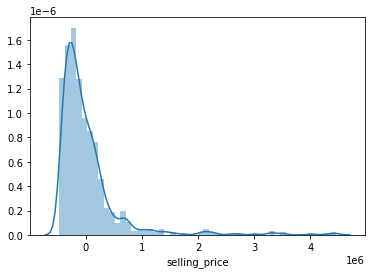

In [178]:
# Plot of Deviation about Mean

print("Root Mean Squared Error = {:.2f}".format(mean_squared_error([y_train.mean()]*len(y_val), y_val,  squared=False)))
sns.distplot(mean_diff)
plt.show()

Median Absolute Deviation about mean = 249802.83


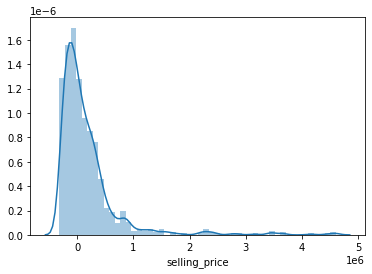

In [174]:
# Plot of Deviation about Median

print("Median Absolute Deviation about mean = {:.2f}".format(median_absolute_error([y_train.mean()]*len(y_val), y_val)))
sns.distplot(median_diff)
plt.show()

## Linear Regression

In [191]:
# Training Linear Reg

reg = LinearRegression(n_jobs=-1).fit(X, y)

Coefficient of Determination = -1.2214
Root Mean Squared Error on Validation Set = 742859.79


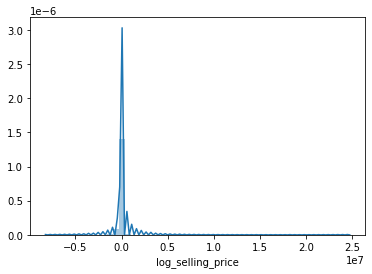

In [193]:
# Evaluation Metrics

y_pred = reg.predict(X)
rmse = mean_squared_error(np.exp(y_pred), np.exp(y), squared=False)

print("Coefficient of Determination = {:.4f}".format(r2_score(np.exp(y), np.exp(y_pred))))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(np.exp(y_pred) - np.exp(y))
plt.show()

## SVM

In [184]:
# Scaling the features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [185]:
# Hyperparameter Tuning: Param:kernel, C(regularization)
# And Training

distributions = dict(kernel=['rbf','poly'], C=[0.01,0.1,1,10,100,1000])
reg_svm = SVR()
final_reg_svm = RandomizedSearchCV(reg_svm, distributions, n_jobs=-1)
model_svm = final_reg_svm.fit(X, y)

In [186]:
# Best Parameters determined by GridSearch

model_svm.best_params_

{'kernel': 'rbf', 'C': 1}

Coefficient of Determination = 0.6150
Root Mean Squared Error on Validation Set = 309244.12


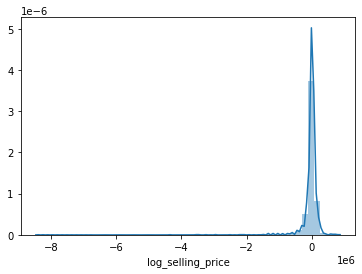

In [189]:
# Evaluation Metrics

y_pred = model_svm.predict(X)
rmse = mean_squared_error(np.exp(y_pred), np.exp(y), squared=False)

print("Coefficient of Determination = {:.4f}".format(r2_score(np.exp(y), np.exp(y_pred))))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(np.exp(y_pred) - np.exp(y))
plt.show()

## Random Forest

In [173]:
# Hyperparameter Tuning using GridSearch

distributions = dict(n_estimators=[i for i in range(100,1000,200)], criterion=['mae','mse'])

reg_forest = RandomForestRegressor()
model_forest = RandomizedSearchCV(reg_forest, distributions, n_jobs=-1)
model_forest.fit(X, y)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]})

In [174]:
model_forest.best_params_

{'n_estimators': 700, 'criterion': 'mae'}

Coefficient of Determination = 0.8665
Root Mean Squared Error on Validation Set = 182112.27


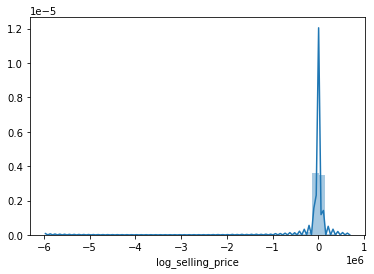

In [178]:
# Evaluation Metrics

y_pred = model_forest.predict(X)
rmse = mean_squared_error(np.exp(y_pred), np.exp(y), squared=False)

print("Coefficient of Determination = {:.4f}".format(r2_score(np.exp(y), np.exp(y_pred))))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(np.exp(y_pred) - np.exp(y))
plt.show()

## Boosted Trees

In [165]:
# Hyperparameter Tuning using RandomSearch

distributions = dict(loss=['lad','ls'], n_estimators=[100,300,500,800,1100], max_depth=[1,2,3,5,7])

reg_boosting = GradientBoostingRegressor()
model_boosting = GridSearchCV(reg_boosting, distributions, n_jobs=-1)
model_boosting.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'loss': ['lad', 'ls'], 'max_depth': [1, 2, 3, 5, 7],
                         'n_estimators': [100, 300, 500, 800, 1100]})

In [166]:
model_boosting.best_params_

{'loss': 'ls', 'max_depth': 3, 'n_estimators': 300}

Coefficient of Determination = 0.6892
Root Mean Squared Error on Validation Set = 277885.48


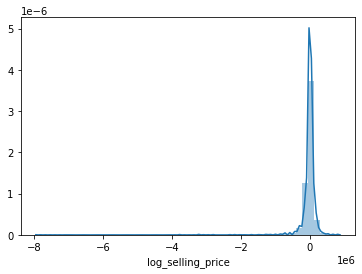

In [179]:
# Evaluation Metrics

y_pred = model_boosting.predict(X)
rmse = mean_squared_error(np.exp(y_pred), np.exp(y), squared=False)

print("Coefficient of Determination = {:.4f}".format(r2_score(np.exp(y), np.exp(y_pred))))
print("Root Mean Squared Error on Validation Set = {:.2f}".\
      format(rmse))

# Distribution Plot of errors
sns.distplot(np.exp(y_pred) - np.exp(y))
plt.show()

# Conclusion

* The best result comes out to have a Coeff of Determination = 0.8665 which is from Random Forest Regressor with best hyperparameters of n_estimators = 700 and criterion = 'MAE'

# References

* https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
* https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/